# Advertising Budget and Sales Forecasting

### Analyse which of the variable is more influencing Sales and predict the sales for new data

In [1]:
#import data
import pandas as pd
data = pd.read_excel(r"E:\Suhani\Notes\Data Science\Data\Advertising data.xlsx")
data

,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
print("Information about the data:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Day                      200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
Information about the data: None


In [3]:
print("Describing the data:",data.describe())

Describing the data:               Day  TV Ad Budget ($)  Radio Ad Budget ($)  \
count  200.000000        200.000000           200.000000   
mean   100.500000        147.042500            23.264000   
std     57.879185         85.854236            14.846809   
min      1.000000          0.700000             0.000000   
25%     50.750000         74.375000             9.975000   
50%    100.500000        149.750000            22.900000   
75%    150.250000        218.825000            36.525000   
max    200.000000        296.400000            49.600000   

       Newspaper Ad Budget ($)   Sales ($)  
count               200.000000  200.000000  
mean                 30.554000   14.022500  
std                  21.778621    5.217457  
min                   0.300000    1.600000  
25%                  12.750000   10.375000  
50%                  25.750000   12.900000  
75%                  45.100000   17.400000  
max                 114.000000   27.000000  


In [139]:
X = data.drop(['Day','Sales ($)'], axis=1)
y = data['Sales ($)']

In [140]:
data.columns

Index(['Day', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

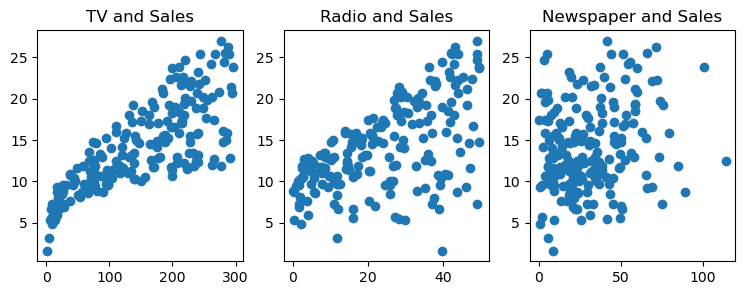

In [141]:
#Graphical representation of change in sales with respect to change in independent variable
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.scatter(data["TV Ad Budget ($)"],y)
plt.title("TV and Sales")

plt.subplot(1,3,2)
plt.scatter(data['Radio Ad Budget ($)'],y)
plt.title("Radio and Sales")

plt.subplot(1,3,3)
plt.scatter(data['Newspaper Ad Budget ($)'],y)
plt.title("Newspaper and Sales")
plt.show()

### From the above graph, Sales is more influenced by TV ad budget more than Radio and Newspaper Ad Budget. But more specifically we cannot say howmuch is it influenced. So we go for correlation.

In [142]:
#Correlation of Sales with corresponding independent variable
print("Correlation of Sales and Independent variables:")
data.corr()

Correlation of Sales and Independent variables:


,Day,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Day,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV Ad Budget ($),0.017715,1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),-0.154944,0.056648,0.354104,1.000000,0.228299
Sales ($),-0.051616,0.782224,0.576223,0.228299,1.000000


### From the above table the correlation between Sales and the independent variables are:
#### corr(Sales, TV add Budget)=0.782224
#### corr(Sales, Radio add Budget)=0.576223
#### corr(Sales, Newspaper add Budget)=0.228299

### Hence, Sales is more influenced by TV add Budget

In [143]:
data.columns

Index(['Day', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [162]:
#OLS regression result
import statsmodels.api as sm
x=data["TV Ad Budget ($)"]
X = sm.add_constant(X)
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sales ($)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        22:43:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9389      0.312      9.422      0.000       2.324       3.554
TV Ad Budget ($)            0.0458      0.001     32.809      0.000       0.043       0.049
Radio Ad Budget ($)         0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper Ad Budget ($)    -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above result it is clear that Adj. R-squared is 0.896. This means that approximately 90% of the total variation in the data can be explained by the model. This also means that the model doesnot account for 10% of the data. This may be due to noice or missing variable.

### Since p-values(Prob (F-statistic)=1.58e-96) is close to zero, there is atleast one predictor in the model that is a good predictor of sales

### If you look at the column, P>|t|, you can see the p_values for each predictor. The p_value of Newspaper Ad budget is 0.86, which indicates that spending on Newspaper Ad has very less, infact no impact on sales. 

In [145]:
data.columns

Index(['Day', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [146]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[ 0.          0.04576465  0.18853002 -0.00103749]
2.9388893694594103


In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.1)

In [148]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (180, 4)
Shape of X_test: (20, 4)
Shape of y_train: (180,)
Shape of y_test: (20,)


In [149]:
#fit the model for training data
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)

In [150]:
#calculate rsquare and MSE for taining data
from sklearn.metrics import r2_score, mean_squared_error
r2_score_train_data = r2_score(y_train_pred,y_train)
n1=len(X_train)
k1=X_train.shape[1]
adj_r2_training = 1 - ((1-r2_score_train_data)*(n1-1)/(n1-k1-1))
mse_training_data = mean_squared_error(y_train,y_train_pred)
print("R2 value of training data:",r2_score_train_data)
print("Mean Square Error of training data:",mse_training_data)
print("Adjusted Rsquare of Training data:",adj_r2_training)

R2 value of training data: 0.8847431211097566
Mean Square Error of training data: 2.8778003093412456
Adjusted Rsquare of Training data: 0.8821086781636939


In [151]:
#fit the model for training data
model.fit(X_test,y_test)
y_test_pred=model.predict(X_test)

In [152]:
#calculate rsquare and MSE for test data
r2_score_test_data = r2_score(y_test_pred,y_test)
mse_testing_data = mean_squared_error(y_test,y_test_pred)
n2=len(X_test)
k2=X_test.shape[1]
adj_r2_testing = 1 - ((1-r2_score_test_data)*(n2-1)/(n2-k2-1))
print("R2 value of training data:",r2_score_test_data)
print("Mean Square Error of training data:",mse_testing_data)
print("Adjusted Rsquare of Testing data:",adj_r2_testing)

R2 value of training data: 0.9059234358020634
Mean Square Error of training data: 1.73302657534138
Adjusted Rsquare of Testing data: 0.8808363520159469


In [163]:
#for new data
new_data = (1,57.5,32.8,23.5)
#Convert it into an array
import numpy as np
new_data_np_array = np.asarray(new_data)

#Reshape the data
new_data_reshape=new_data_np_array.reshape(1,-1)

#fit the new data to the Naive Bayes model
prediction = model.predict(new_data_reshape)
print("Predicted sales:",prediction)


Predicted sales: [11.80164961]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
